# Titanic Probability

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sn

In [6]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Query for Children

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bdaf490>]],
      dtype=object)

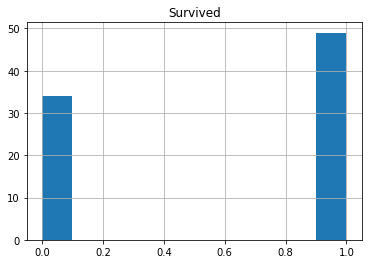

In [13]:
children = df[df['Age'] < 16]
children.hist('Survived')

## Separate Living from Dead

In [17]:
living_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]

not_surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 0)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1c5c8bd0>,
      dtype=object)

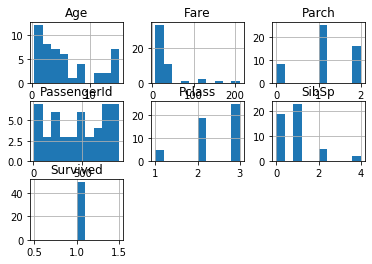

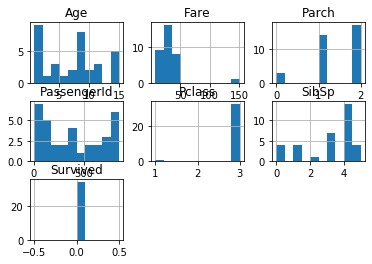

In [16]:
living_children.hist()

not_surviving_children.hist()

In [27]:
women_and_children = df[(df['Sex'].str.match('female')) | (df['Age'] < 16)]

w_a_c_survival_rate = women_and_children['Survived'].value_counts(normalize=True) * 100
w_a_c_survival_rate

1    71.751412
0    28.248588
Name: Survived, dtype: float64

In [28]:
adult_men = df[(df['Sex'].str.match('male')) & (df['Age'] > 16)]
a_m_survival_rate = adult_men['Survived'].value_counts(normalize=True) * 100
a_m_survival_rate

0    82.338308
1    17.661692
Name: Survived, dtype: float64

In [31]:
children = df[df['Age'] < 16]
surviving_children = df[(df['Age'] < 16) & (df['Survived'] == 1)]
child_chance_of_survival = surviving_children.shape[0] / children.shape[0]
format(child_chance_of_survival, ".0%")

'59%'

In [35]:
women = df[(df['Sex'] == 'female') & (df['Age'] > 16)]
surviving_women = df[(df['Sex'] == 'female') & (df['Age'] > 16) & (df['Survived'] == 1)]
women_chance_of_survival = surviving_women.shape[0] / women.shape[0]
format(women_chance_of_survival, ".0%")

'77%'

In [44]:
men = df[(df['Sex'] == 'male') & (df['Age'] > 16)]
surviving_men = df[(df['Sex'] == 'male') & (df['Age'] > 16) & df['Survived'] == 1]
men_chance_of_survival = surviving_men.shape[0] / men.shape[0]
format(men_chance_of_survival, ".0%")

'18%'

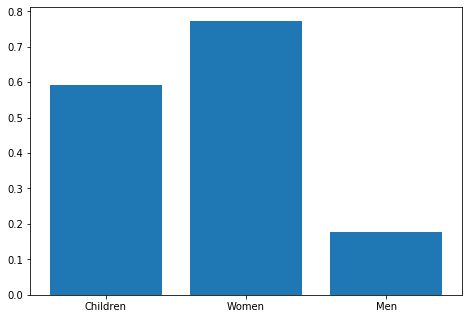

In [45]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x_axis = ["Children", "Women", "Men"]
data = [child_chance_of_survival, women_chance_of_survival, men_chance_of_survival]
ax.bar(x_axis, data)
plt.show()

In [46]:
surviving_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 1)]
surviving_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,71.000000,71.0,71.000000,71.000000,71.000000,71.000000,71.000000
mean,485.267606,1.0,1.873239,34.323944,0.267606,0.126761,46.731869
std,222.128789,0.0,0.955130,11.798032,0.476827,0.411602,85.316448
min,22.000000,1.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,288.000000,1.0,1.000000,26.500000,0.000000,0.000000,8.050000
50%,513.000000,1.0,1.000000,32.000000,0.000000,0.000000,26.550000
75%,654.500000,1.0,3.000000,41.000000,0.500000,0.000000,54.270850
max,890.000000,1.0,3.000000,80.000000,2.000000,2.000000,512.329200


In [47]:
dead_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Survived'] == 0)]
dead_men.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.0,331.000000,331.000000,331.000000,331.000000,331.000000
mean,446.972810,0.0,2.383686,33.496979,0.250755,0.166163,22.562523
std,260.482075,0.0,0.779028,12.970596,0.516947,0.566384,33.570494
min,1.000000,0.0,1.000000,17.000000,0.000000,0.000000,0.000000
25%,212.000000,0.0,2.000000,23.000000,0.000000,0.000000,7.854200
50%,443.000000,0.0,3.000000,30.000000,0.000000,0.000000,10.170800
75%,680.000000,0.0,3.000000,40.500000,0.000000,0.000000,26.000000
max,891.000000,0.0,3.000000,74.000000,3.000000,5.000000,263.000000


In [48]:
third_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 3)]
thrird_class_adult_men_survival_rate = third_class_adult_men['Survived'].value_counts(normalize=True) * 100
thrird_class_adult_men_survival_rate

first_class_adult_men = df[(df['Sex'] == "male") & (df['Age'] > 16) & (df['Pclass'] == 1)]
first_class_adult_men_survival_rate = first_class_adult_men['Survived'].value_counts(normalize=True) * 100
first_class_adult_men_survival_rate

0    62.244898
1    37.755102
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1cdea150>,
      dtype=object)

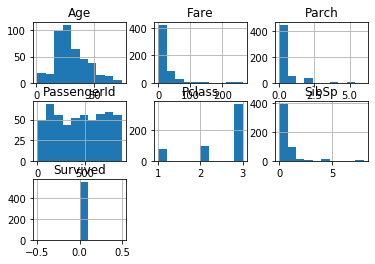

In [49]:
the_dead = df[df["Survived"] == 0]
the_dead.hist()

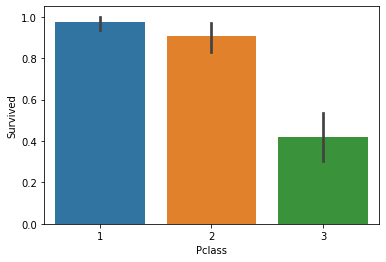

In [50]:
sn.barplot(x='Pclass', y='Survived', data=women)


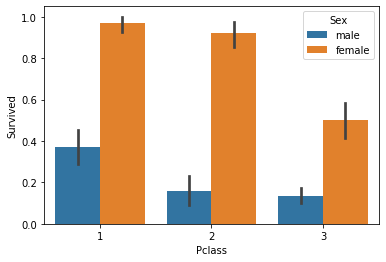

In [51]:
sn.barplot(x='Pclass', y='Survived', hue="Sex", data=df)


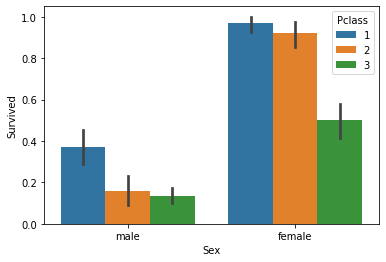

In [52]:
sn.barplot(x='Sex', y='Survived', hue="Pclass", data=df)
